# Применение фильтров в библиотеке OpenCV

OpenCV (Open Source Computer Vision Library) — это мощная кроссплатформенная библиотека для обработки изображений, видео и компьютерного зрения.
Она написана на C++ и имеет Python-обёртку cv2.
Основная особенность OpenCV — высокая производительность и большое количество готовых функций для фильтрации, геометрических преобразований, обнаружения контуров, распознавания лиц, и т.д.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



cv2 — модуль OpenCV для Python, включает функции чтения/записи изображений, фильтрации, морфологии, анализа и т.п.

numpy — стандартная библиотека для работы с массивами и матрицами.

matplotlib.pyplot — используется для визуализации (отображения изображений, графиков и т.п.).

In [ ]:


# === 1. Загружаем пример изображения ===
# (Можно заменить на своё изображение)
image = cv2.imread("Lenna.jpg", cv2.IMREAD_GRAYSCALE)



cv2.imread(path, flags) — читает изображение из файла и возвращает его как numpy.ndarray.

path — путь к файлу.

flags — режим чтения:

cv2.IMREAD_COLOR (по умолчанию) — изображение в RGB.

cv2.IMREAD_GRAYSCALE — в градациях серого (1 канал).

cv2.IMREAD_UNCHANGED — без изменений (включая альфа-канал).

cv2.samples.findFile("lena.jpg") — утилита OpenCV, которая ищет встроенные примеры (если lena.jpg установлен вместе с библиотекой).
Если нет, можно заменить на собственный путь, например "data/lena.png".

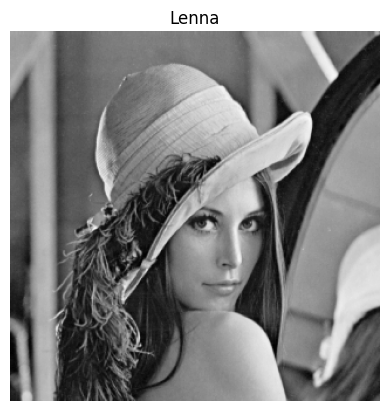

In [ ]:
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Lenna')
plt.show()

In [ ]:

# === 2. Определяем ядро (kernel) ===
# Ядро — это маленькая матрица весов, которая "скользит" по изображению.
# Пример: горизонтальный фильтр Собеля (выделяет горизонтальные края)
kernel = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

Ядро (kernel) — это маленькая матрица чисел (весов), которая “скользит” по изображению и вычисляет новое значение каждого пикселя как взвешенную сумму окрестности.
Пример: это ядро — фильтр Собеля для выделения горизонтальных границ (разность яркости сверху и снизу).

Размер ядра обычно 3×3, 5×5, 7×7 и т.д.

Чем больше ядро — тем сильнее эффект сглаживания или выделения структур.

In [ ]:

# === 3. Применяем свёртку ===
# cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])
# src        — входное изображение
# ddepth     — глубина выходного изображения (-1 → как у входного)
# kernel     — матрица фильтра
# anchor     — координаты центра ядра (-1, -1) → по центру
# delta      — добавляется к результату (обычно 0)
# borderType — тип обработки краёв (cv2.BORDER_CONSTANT, REFLECT, REPLICATE...)

output = cv2.filter2D(image, ddepth=-1, kernel=kernel, borderType=cv2.BORDER_REFLECT)


| Параметр     | Значение                                   | Описание                                                                    |
| ------------ | ------------------------------------------ | --------------------------------------------------------------------------- |
| `src`        | входное изображение (`numpy.ndarray`)      | Исходные данные для фильтрации                                              |
| `ddepth`     | глубина (тип данных) выходного изображения | `-1` — сохранить тип исходного (`uint8 → uint8`), можно `cv2.CV_32F` и т.д. |
| `kernel`     | ядро фильтра                               | Матрица весов (любого размера, чаще 3×3 или 5×5)                            |
| `dst`        | (необязательный) выходной массив           | Обычно не указывается                                                       |
| `anchor`     | координаты центра ядра                     | По умолчанию `(-1, -1)` — центр матрицы                                     |
| `delta`      | добавляемая константа                      | Обычно `0`; используется для смещения яркости                               |
| `borderType` | способ обработки краёв изображения         | См. ниже                                                                    |


Параметр borderType: обработка краёв

Когда фильтр доходит до края, часть окна ядра “вылезает” за границы изображения.
Чтобы свёртка всё равно могла посчитать значение, OpenCV дополняет изображение выбранным способом.

| Константа                | Как работает                                                    | Пример                          |
| ------------------------ | --------------------------------------------------------------- | ------------------------------- |
| `cv2.BORDER_CONSTANT`    | заполняет края постоянным значением (по умолчанию 0)            | добавляется чёрная рамка        |
| `cv2.BORDER_REPLICATE`   | повторяет крайние пиксели                                       | края “растягиваются”            |
| `cv2.BORDER_REFLECT`     | отражает содержимое изображения (зеркально)                     | естественный переход            |
| `cv2.BORDER_REFLECT_101` | как `REFLECT`, но без дублирования крайнего пикселя             | чуть мягче                      |
| `cv2.BORDER_WRAP`        | “заворачивает” изображение — противоположные края соединяются   | полезно для циклических текстур |
| `cv2.BORDER_ISOLATED`    | обрабатывает только заданную область, игнорируя внешние пиксели | редко используется              |


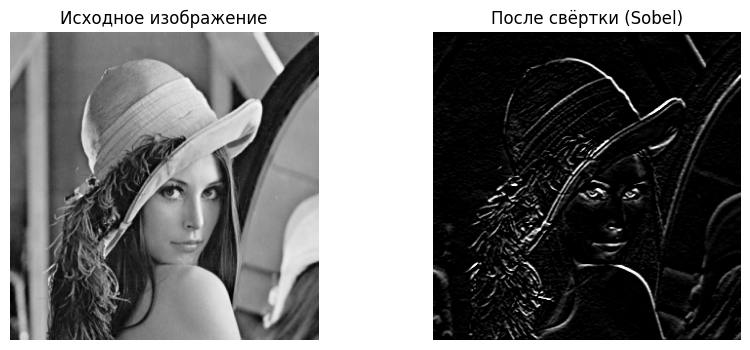

In [ ]:

# === 4. Визуализируем результат ===
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Исходное изображение")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(output, cmap='gray')
plt.title("После свёртки (Sobel)")
plt.axis('off')

plt.show()


plt.figure(figsize=(10,4)) — создаёт область для рисования с заданным размером.

plt.subplot(rows, cols, index) — выбирает ячейку сетки для вывода (1×2 → 2 картинки).

plt.imshow() — отображает изображение (cmap='gray' делает чёрно-белую палитру).

plt.axis('off') — убирает оси, чтобы не мешали.

plt.title() — добавляет подпись к каждому изображению.

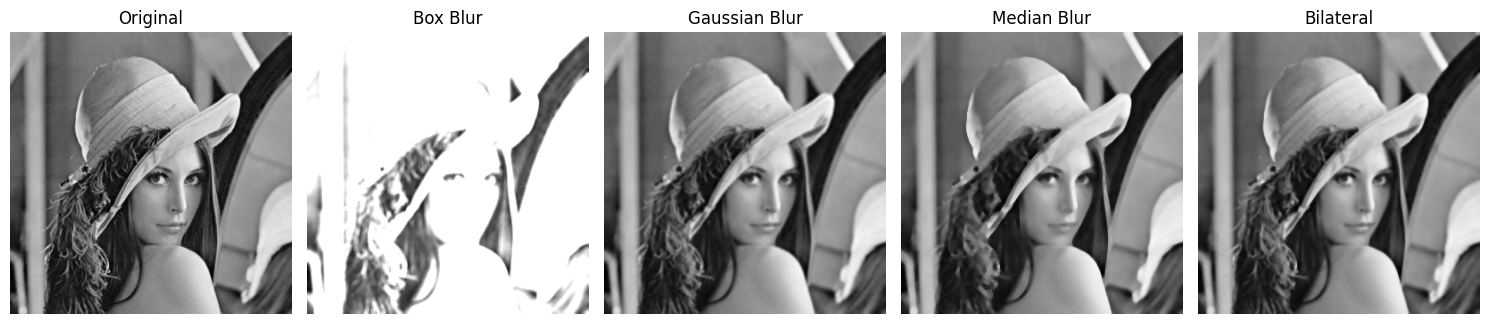

In [ ]:
# === 2. ФИЛЬТРЫ СГЛАЖИВАНИЯ (BLUR / SMOOTHING) ===

# 2.1 Box Blur
box_kernel = np.ones((5, 5), np.float32) / 9
box_blur = cv2.filter2D(image, -1, box_kernel)

# 2.2 Gaussian Blur
gaussian_blur = cv2.GaussianBlur(image, (5, 5), sigmaX=1)

# 2.3 Median Blur
median_blur = cv2.medianBlur(image, 5)

# 2.4 Bilateral Blur
bilateral = cv2.bilateralFilter(image, 5, 75, 75)

# === 3. Отображаем результаты ===
titles = ['Original', 'Box Blur', 'Gaussian Blur', 'Median Blur', 'Bilateral']
images = [image, box_blur, gaussian_blur, median_blur, bilateral]

plt.figure(figsize=(15, 6))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

**📘 1. cv2.filter2D(src, ddepth, kernel)** — линейная фильтрация с произвольным ядром

Применяет ядро (матрицу свертки) ко всем пикселям изображения.

src — входное изображение.

ddepth — глубина выходного изображения (-1 → как у входного).

kernel — ядро свертки (матрица коэффициентов).

Пример — Box Blur (усреднение по окрестности 3×3)

**📘 2. cv2.GaussianBlur(src, ksize, sigmaX) — гауссовое сглаживание**

Фильтр использует весовую функцию Гаусса — ближние пиксели влияют сильнее, чем дальние.

ksize — размер ядра (например (5,5)).

sigmaX — стандартное отклонение (радиус сглаживания).

**📘 3. cv2.medianBlur(src, ksize) — медианный фильтр**

Нелинейный фильтр: заменяет каждый пиксель на медиану значений в окне ksize×ksize.

Хорошо удаляет импульсные шумы (“соль и перец”), сохраняя края.

ksize — нечетное число (3, 5, 7, ...).

** 📘  4. cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace) — билинейный (двусторонний) фильтр**

Учитывает не только расстояние между пикселями, но и разницу яркости —
благодаря этому сглаживает шум, сохраняя резкие границы.

d — диаметр окна фильтра.

sigmaColor — насколько сильно усредняются пиксели с разной яркостью.

sigmaSpace — радиус усреднения в пространстве (расстояние между пикселями).

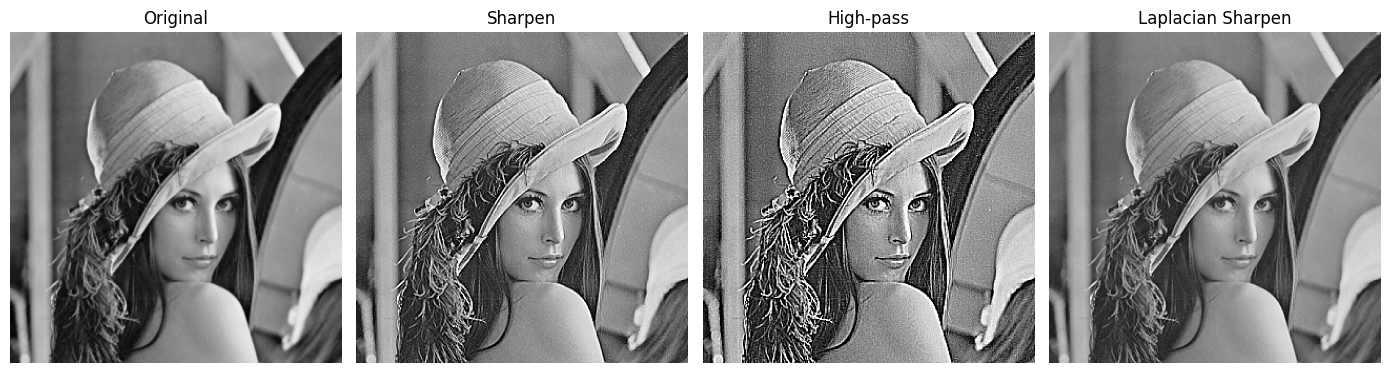

In [ ]:
# ------------------------------------------------
# === 3. ФИЛЬТРЫ ПОВЫШЕНИЯ РЕЗКОСТИ (SHARPENING) ===
# ------------------------------------------------

# 3.1 Базовый Sharpen (усиление центрального пикселя)
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
sharpen = cv2.filter2D(image, -1, sharpen_kernel)

# 3.2 High-pass Sharpen (еще сильнее усиливает контуры)
highpass_kernel = np.array([[-1, -1, -1],
                            [-1, 9, -1],
                            [-1, -1, -1]])
highpass = cv2.filter2D(image, -1, highpass_kernel)

# 3.3 Laplacian-based Sharpen (через оператор Лапласа)
lap = cv2.Laplacian(image, cv2.CV_64F)
lap_sharp = cv2.convertScaleAbs(image - 0.3 * lap)

# === 4. Отображаем результаты ===
titles = ['Original', 'Sharpen', 'High-pass', 'Laplacian Sharpen']
images = [image, sharpen, highpass, lap_sharp]

plt.figure(figsize=(14, 6))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

1️⃣ cv2.filter2D(src, ddepth, kernel)

— выполняет свертку изображения с ядром.
Используется для линейных фильтров — sharpening, blur и др.

src — входное изображение

ddepth = -1 — глубина выходного = входному

kernel — матрица весов, задающая тип фильтра

Примеры:

[[0,-1,0],[-1,5,-1],[0,-1,0]] — усиливает центр, ослабляет соседей → повышение резкости

[[−1,−1,−1], [−1,9,−1], [−1,−1,−1]] — high-pass, выделяет контуры сильнее

2️⃣ cv2.Laplacian(src, ddepth)

— вычисляет вторую производную яркости (детектор границ).
Используется в sharpen-подобных фильтрах для добавления деталей.

3️⃣ cv2.convertScaleAbs(src)

— конвертирует результат свертки в 8-битное изображение с отсечением отрицательных значений.
Применяется после фильтров с float-результатами.

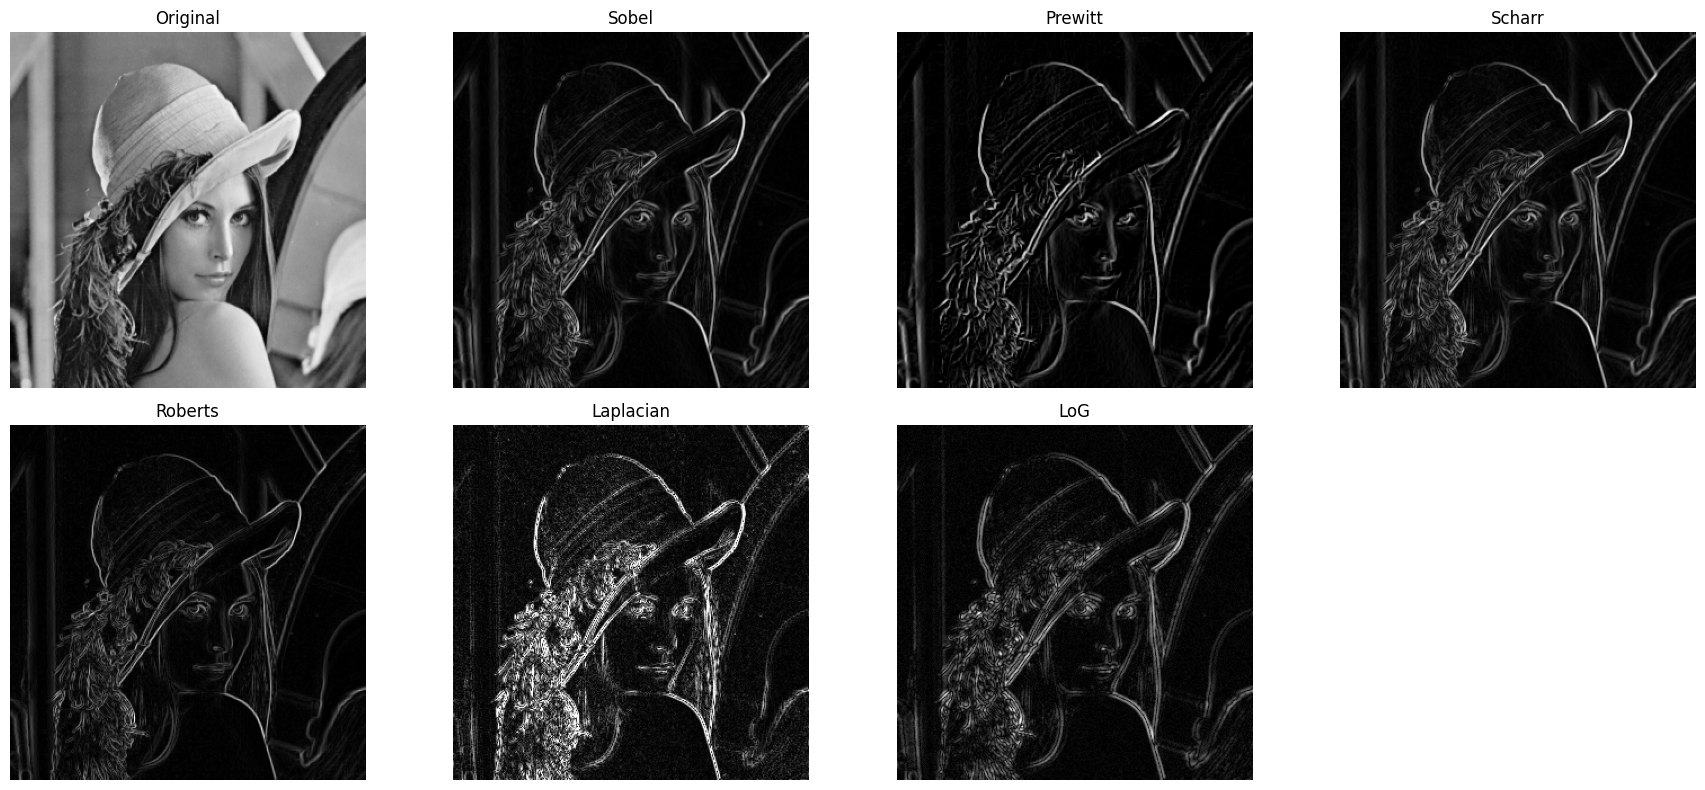

In [ ]:
from scipy import ndimage
# ------------------------------------------------
# === 4. ГРАДИЕНТНЫЕ ФИЛЬТРЫ ===
# ------------------------------------------------

# 4.1 Sobel (по X и Y)
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)

# 4.2 Prewitt (реализуем вручную)
prewitt_kernelx = np.array([[-1, 0, 1],
                            [-1, 0, 1],
                            [-1, 0, 1]])
prewitt_kernely = prewitt_kernelx.T
prewittx = cv2.filter2D(image, -1, prewitt_kernelx)
prewitty = cv2.filter2D(image, -1, prewitt_kernely)
prewitt = cv2.magnitude(prewittx.astype(float), prewitty.astype(float))

# 4.3 Scharr (улучшенная версия Sobel)
scharrx = cv2.Scharr(image, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(image, cv2.CV_64F, 0, 1)
scharr = cv2.magnitude(scharrx, scharry)

# 4.4 Roberts (2x2 операторы)
roberts_cross_x = np.array([[1, 0],
                            [0, -1]])
roberts_cross_y = np.array([[0, 1],
                            [-1, 0]])
robertsx = ndimage.convolve(image.astype(float), roberts_cross_x)
robertsy = ndimage.convolve(image.astype(float), roberts_cross_y)
roberts = np.sqrt(robertsx**2 + robertsy**2)

# ------------------------------------------------
# === 5. ВТОРАЯ ПРОИЗВОДНАЯ: LAPLACIAN ===
# ------------------------------------------------

laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=3)
laplacian = cv2.convertScaleAbs(laplacian)

# 5.1 Laplacian of Gaussian (LoG)
gaussian = cv2.GaussianBlur(image, (5,5), 1.0)
log = cv2.Laplacian(gaussian, cv2.CV_64F)
log = cv2.convertScaleAbs(log)

# ------------------------------------------------
# === 6. ВИЗУАЛИЗАЦИЯ ===
# ------------------------------------------------

titles = ['Original', 'Sobel', 'Prewitt', 'Scharr', 'Roberts', 'Laplacian', 'LoG']
images = [image, sobel, prewitt, scharr, roberts, laplacian, log]

plt.figure(figsize=(18, 8))
for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

1️⃣ cv2.Sobel(src, ddepth, dx, dy, ksize)

Вычисляет градиент яркости по горизонтали и вертикали — то есть находит края.
Обычно используется с dx=1, dy=0 (по X) и dx=0, dy=1 (по Y).

Параметры:

src — исходное изображение

ddepth — тип выходных данных (cv2.CV_64F для сохранения отрицательных значений)

dx, dy — направление производной (по X или Y)

ksize — размер ядра (3, 5 или 7)

2️⃣ cv2.filter2D(src, ddepth, kernel)

Общая функция свертки: применяет заданную матрицу (ядро) ко всем пикселям.
Используется для ручной реализации фильтров вроде Prewitt.

Параметры:

src — входное изображение

ddepth — глубина выходного (обычно -1)

kernel — матрица весов (ядро фильтра)

3️⃣ cv2.Scharr(src, ddepth, dx, dy)

Похож на Sobel, но даёт более точный результат для маленьких ядер (3×3).
Лучше выделяет контуры и резкие изменения яркости.

Параметры:

src — изображение

ddepth — глубина выходного (cv2.CV_64F)

dx, dy — направление градиента (1,0) или (0,1)

4️⃣ scipy.ndimage.convolve(input, kernel)

Выполняет свертку вручную (альтернатива filter2D).
Используется для простых фильтров вроде Roberts, где ядро 2×2.

Параметры:

input — изображение (numpy-массив)

kernel — ядро свертки (например, [[1,0],[0,-1]])

5️⃣ cv2.Laplacian(src, ddepth, ksize)

Находит вторую производную — усиливает контуры и мелкие детали.
Показывает, где яркость резко меняется.

Параметры:

src — изображение

ddepth — тип выходного (cv2.CV_64F)

ksize — размер ядра (обычно 3)

6️⃣ cv2.GaussianBlur(src, ksize, sigmaX)

Сглаживает изображение, уменьшая шум перед применением Laplacian (в LoG).

Параметры:

src — изображение

ksize — размер ядра (например (5,5))

sigmaX — степень размытия по оси X

7️⃣ cv2.convertScaleAbs(src)

Преобразует изображение в 8-битный формат и берёт абсолютные значения.
Используется после фильтров, где возможны отрицательные пиксели (например Laplacian).

# Знакомство с PyTorch и функцией torch.nn.functional.conv2d

PyTorch — это библиотека глубокого обучения, в которой операции над тензорами (многомерными массивами) тесно связаны с автоматическим дифференцированием.
Функция torch.nn.functional.conv2d() реализует двумерную свёртку, аналогичную той, что выполняют свёрточные слои в CNN.

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

1. Подготовка данных

В PyTorch все операции свёртки выполняются над 4-мерными тензорами с формой
[N, C, H, W], где:

N — размер батча (batch size), количество изображений в пакете;

C — количество каналов (channels): 1 для grayscale, 3 для RGB;

H, W — высота и ширина изображения (height, width).

Наше изображение из OpenCV имеет тип numpy.ndarray формы [H, W], то есть без измерений N и C.
Поэтому мы сначала преобразуем его в тензор PyTorch (torch.Tensor) и добавим недостающие размерности.

In [ ]:

# === 1. Подготовка изображения ===
# OpenCV возвращает NumPy-массив, нужно преобразовать его в PyTorch-тензор
# Размерность в PyTorch для conv2d: (batch, channels, height, width)

import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# image: np.ndarray формы (H, W) из OpenCV (одно канальное изображение)
# 1) преобразуем в тензор float32
img_t = torch.from_numpy(image).float()  # теперь тип torch.FloatTensor, форма [H, W]

# 2) добавляем размерность канала C (теперь [1, H, W])
img_t = img_t.unsqueeze(0)

# 3) добавляем размерность батча N (теперь [1, 1, H, W])
img_t = img_t.unsqueeze(0)

print("Форма тензора:", img_t.shape)

Форма тензора: torch.Size([1, 1, 316, 316])


Но вообще это можно сделать в одну строчку:

In [ ]:

# Преобразуем grayscale-изображение (H×W) → (1, 1, H, W)
image_torch = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

print(f"Форма входного тензора: {tuple(image_torch.shape)}  (batch, channel, height, width)")

Форма входного тензора: (1, 1, 316, 316)  (batch, channel, height, width)


Ядро должно иметь форму (out_channels, in_channels, kernel_height,
 kernel_width)

PyTorch conv2d требует ядро формы [C_out, C_in, kH, kW].
Это принципиально: без 4D формы conv2d не примет ядро.

kernel = torch.tensor([...], dtype=torch.float32)

Здесь ты сразу создаёшь 4-мерный тензор нужной формы:

Внешний список [...] — это out_channels. У тебя один фильтр ⇒ C_out = 1.

Следующий уровень вложенности — in_channels. Изображение у нас grayscale ⇒ C_in = 1.

Внутренняя 2D-матрица 3×3 — это сами веса ядра ⇒ kH = 3, kW = 3.

dtype=torch.float32 — тип весов ядра. Свёртки в PyTorch работают во float; с uint8 не будет.

Итоговая форма ядра: [1, 1, 3, 3].
Это фильтр Собеля по вертикали (Sobel-Y): он реагирует на горизонтальные границы (разность “низ-верх”).

Почему это именно Sobel-Y: верхняя строка отрицательная, нижняя — положительная, средняя — нули. Это вычисляет вертикальный градиент (изменение по оси Y), подчёркивая переходы «снизу-вверх» / «сверху-вниз».


In [ ]:
# === 2. Определяем ядро (kernel) ===
# Ядро должно иметь форму (out_channels, in_channels, kernel_height, kernel_width)
kernel = torch.tensor([
    [[
        [-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]
    ]]
], dtype=torch.float32)

print(f"Форма ядра: {tuple(kernel.shape)}  (out_channels, in_channels, kH, kW)")



Форма ядра: (1, 1, 3, 3)  (out_channels, in_channels, kH, kW)


**Функция torch.nn.functional.conv2d**

Это базовая функция свёртки, которая используется во всех свёрточных слоях PyTorch.
Она принимает на вход тензор изображения и ядро фильтра, выполняет свёртку и возвращает результат.

| Аргумент       | Тип / форма                                    | Описание                                                                                                                                                                                                                 |
| -------------- | ---------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **`input`**    | `torch.Tensor` формы `[N, C_in, H, W]`         | Входное изображение (или батч изображений) <br>• `N` — размер батча (обычно 1)<br>• `C_in` — количество каналов (1 для grayscale, 3 для RGB)<br>• `H, W` — высота и ширина                                               |
| **`weight`**   | `torch.Tensor` формы `[C_out, C_in, kH, kW]`   | Ядро фильтра <br>• `C_out` — число фильтров (на выходе столько же каналов)<br>• `C_in` — должно совпадать с каналами входа<br>• `kH, kW` — размер ядра                                                                   |
| **`bias`**     | `torch.Tensor` формы `[C_out]` *(опционально)* | Добавляется к каждому выходному каналу (смещение)                                                                                                                                                                        |
| **`stride`**   | `int` или `(int, int)`                         | Шаг свёртки (насколько “перескакивает” окно) <br>• `stride=1` — обычная свёртка пиксель за пикселем <br>• `stride=2` — уменьшает размер карты признаков вдвое                                                            |
| **`padding`**  | `int` или `(int, int)`                         | Количество нулей, добавляемых вокруг изображения <br>• `padding=0` — без рамки, результат меньше <br>• `padding=1` при ядре 3×3 — сохраняет размер <br>• значение больше → больше нулевой рамки                          |
| **`dilation`** | `int` или `(int, int)`                         | Расстояние между элементами ядра (“дырявая свёртка”) <br>• `dilation=1` — обычная свёртка <br>• `dilation=2` — увеличивает receptive field (используется в сегментации)                                                  |
| **`groups`**   | `int`                                          | Определяет, как разделяются входные и выходные каналы <br>• `groups=1` — стандартная свёртка (все каналы обрабатываются общим ядром) <br>• `groups=C_in` — **depthwise convolution** (каждый канал фильтруется отдельно) |


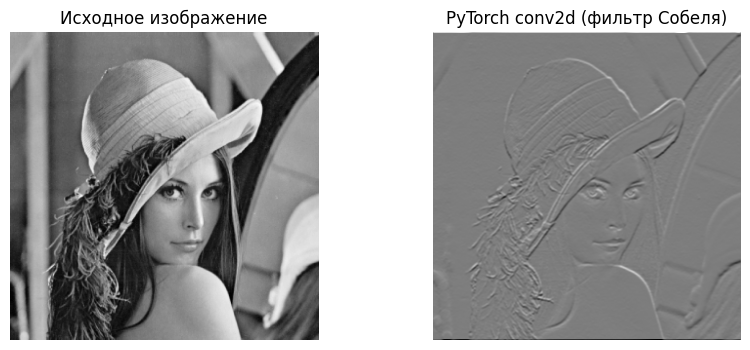

In [ ]:

# === 3. Применяем свёртку ===
# F.conv2d(input, weight, bias=None, stride=1, padding=0, dilation=1, groups=1)
# input   — входной тензор
# weight  — ядро фильтра
# bias    — добавка после свёртки (обычно None)
# stride  — шаг фильтра (как сильно "перескакивает" окно)
# padding — сколько нулей добавить вокруг входа (сохраняет размер)
# dilation — расстояние между элементами ядра (для dilated conv)
# groups  — группировка каналов (для depthwise conv)

output = F.conv2d(image_torch, kernel, stride=1, padding=1)

# === 4. Преобразуем обратно для отображения ===
output_np = output[0, 0].detach().numpy()

# === 5. Визуализация ===
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Исходное изображение")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(output_np, cmap='gray')
plt.title("PyTorch conv2d (фильтр Собеля)")
plt.axis('off')

plt.show()


Форма входного тензора: (1, 1, 316, 316)  (batch, channel, height, width)


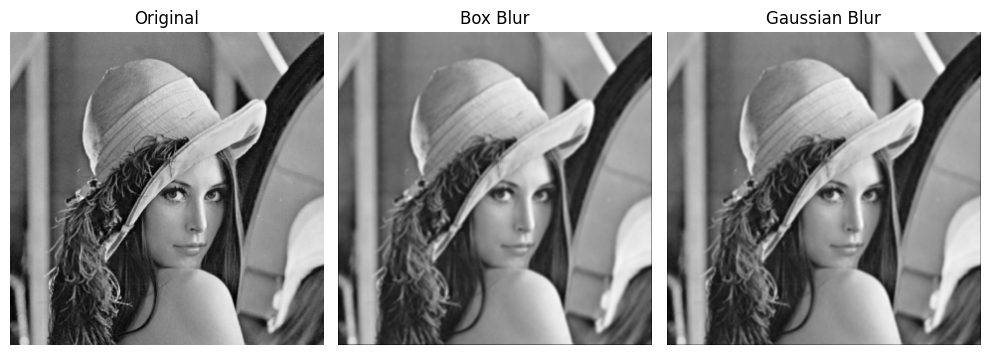

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# === 1. Подготовка изображения ===
image_torch = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
print(f"Форма входного тензора: {tuple(image_torch.shape)}  (batch, channel, height, width)")

def to_np(t): return t[0, 0].detach().numpy()

# ------------------------------------------------
# === 2. СГЛАЖИВАНИЕ (BLUR / SMOOTHING) ===
# ------------------------------------------------

# 2.1 Box Blur
box_kernel = torch.ones((1, 1, 3, 3)) / 9.0
box_blur = F.conv2d(image_torch, box_kernel, padding=1)

# 2.2 Gaussian Blur
gauss_kernel = torch.tensor([[[[1, 2, 1],
                               [2, 4, 2],
                               [1, 2, 1]]]], dtype=torch.float32)
gauss_kernel /= gauss_kernel.sum()
gauss_blur = F.conv2d(image_torch, gauss_kernel, padding=1)

# === Визуализация сглаживания ===
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(to_np(image_torch), cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(to_np(box_blur), cmap='gray')
plt.title("Box Blur")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(to_np(gauss_blur), cmap='gray')
plt.title("Gaussian Blur")
plt.axis('off')

plt.tight_layout()
plt.show()

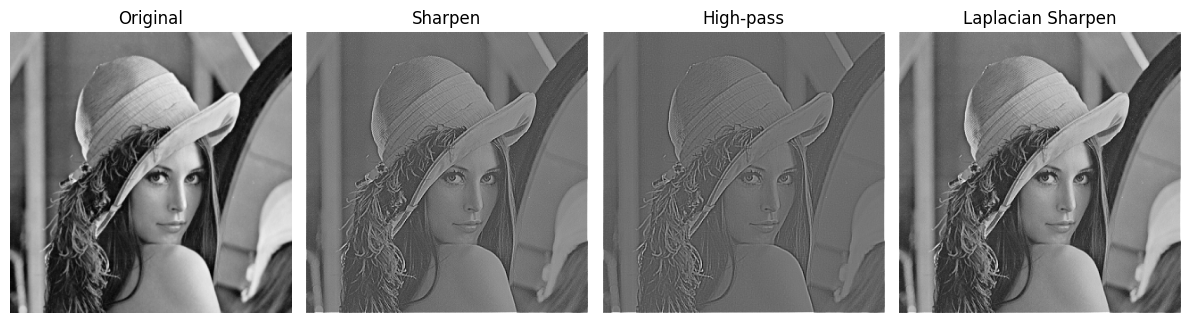

In [ ]:
# ------------------------------------------------
# === 3. ПОВЫШЕНИЕ РЕЗКОСТИ (SHARPENING) ===
# ------------------------------------------------

# 3.1 Basic Sharpen
sharpen_kernel = torch.tensor([[[[0, -1, 0],
                                 [-1, 5, -1],
                                 [0, -1, 0]]]], dtype=torch.float32)
sharpen = F.conv2d(image_torch, sharpen_kernel, padding=1)

# 3.2 High-pass
highpass_kernel = torch.tensor([[[[-1, -1, -1],
                                  [-1, 9, -1],
                                  [-1, -1, -1]]]], dtype=torch.float32)
highpass = F.conv2d(image_torch, highpass_kernel, padding=1)

# 3.3 Laplacian-based Sharpen
lap_kernel = torch.tensor([[[[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]]]], dtype=torch.float32)
lap = F.conv2d(image_torch, lap_kernel, padding=1)
lap_sharp = image_torch - 0.3 * lap

# === Визуализация резкости ===
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(to_np(image_torch), cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(to_np(sharpen), cmap='gray')
plt.title("Sharpen")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(to_np(highpass), cmap='gray')
plt.title("High-pass")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(to_np(lap_sharp), cmap='gray')
plt.title("Laplacian Sharpen")
plt.axis('off')

plt.tight_layout()
plt.show()


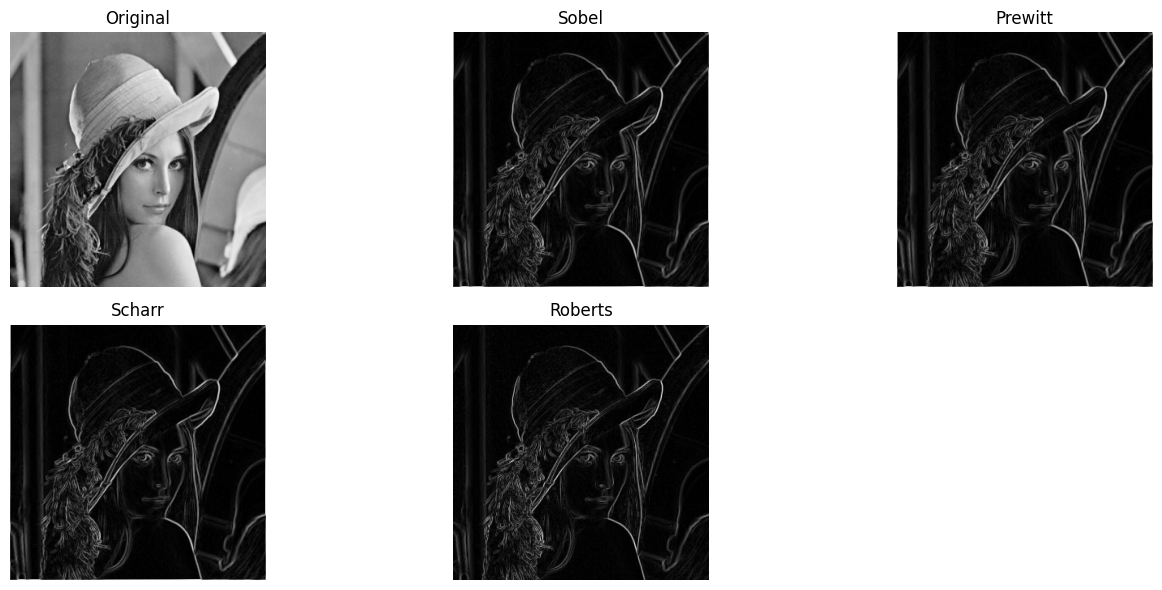

In [ ]:
# ------------------------------------------------
# === 4. ГРАДИЕНТНЫЕ ФИЛЬТРЫ ===
# ------------------------------------------------

# 4.1 Sobel
sobelx = torch.tensor([[[[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]]]], dtype=torch.float32)
sobely = torch.tensor([[[[-1, -2, -1],
                         [ 0,  0,  0],
                         [ 1,  2,  1]]]], dtype=torch.float32)
sobel_x = F.conv2d(image_torch, sobelx, padding=1)
sobel_y = F.conv2d(image_torch, sobely, padding=1)
sobel = torch.sqrt(sobel_x**2 + sobel_y**2)

# 4.2 Prewitt
prewittx = torch.tensor([[[[-1, 0, 1],
                           [-1, 0, 1],
                           [-1, 0, 1]]]], dtype=torch.float32)
prewitty = torch.tensor([[[[-1, -1, -1],
                           [ 0,  0,  0],
                           [ 1,  1,  1]]]], dtype=torch.float32)
prew_x = F.conv2d(image_torch, prewittx, padding=1)
prew_y = F.conv2d(image_torch, prewitty, padding=1)
prewitt = torch.sqrt(prew_x**2 + prew_y**2)

# 4.3 Scharr
scharrx = torch.tensor([[[[-3, 0, 3],
                          [-10, 0, 10],
                          [ -3, 0, 3]]]], dtype=torch.float32)
scharry = torch.tensor([[[[-3, -10, -3],
                          [ 0,   0,  0],
                          [ 3,  10,  3]]]], dtype=torch.float32)
scharr_x = F.conv2d(image_torch, scharrx, padding=1)
scharr_y = F.conv2d(image_torch, scharry, padding=1)
scharr = torch.sqrt(scharr_x**2 + scharr_y**2)

# 4.4 Roberts
robertsx = torch.tensor([[[[1, 0],
                           [0, -1]]]], dtype=torch.float32)
robertsy = torch.tensor([[[[0, 1],
                           [-1, 0]]]], dtype=torch.float32)
rob_x = F.conv2d(image_torch, robertsx)
rob_y = F.conv2d(image_torch, robertsy)
roberts = torch.sqrt(rob_x**2 + rob_y**2)

# === Визуализация градиентов ===
plt.figure(figsize=(14, 6))
plt.subplot(2, 3, 1)
plt.imshow(to_np(image_torch), cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(to_np(sobel), cmap='gray')
plt.title("Sobel")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(to_np(prewitt), cmap='gray')
plt.title("Prewitt")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(to_np(scharr), cmap='gray')
plt.title("Scharr")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(to_np(roberts), cmap='gray')
plt.title("Roberts")
plt.axis('off')

plt.tight_layout()
plt.show()

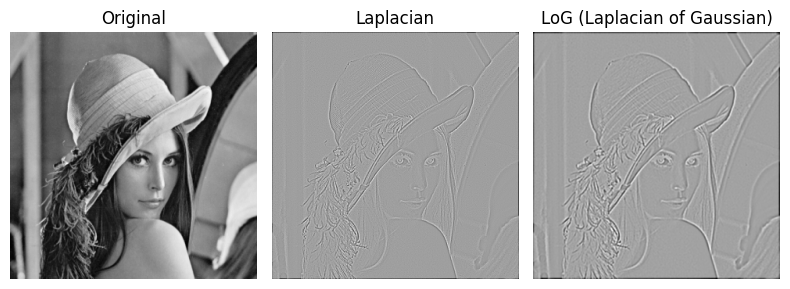

In [ ]:
# ------------------------------------------------
# === 5. ВТОРАЯ ПРОИЗВОДНАЯ (LAPLACIAN / LoG) ===
# ------------------------------------------------

laplacian_kernel = torch.tensor([[[[0, 1, 0],
                                   [1, -4, 1],
                                   [0, 1, 0]]]], dtype=torch.float32)
laplacian = F.conv2d(image_torch, laplacian_kernel, padding=1)

gauss_kernel = torch.tensor([[[[1, 2, 1],
                               [2, 4, 2],
                               [1, 2, 1]]]], dtype=torch.float32)
gauss_kernel /= gauss_kernel.sum()
gauss_blur = F.conv2d(image_torch, gauss_kernel, padding=1)
log = F.conv2d(gauss_blur, laplacian_kernel, padding=1)

# === Визуализация Laplacian ===
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.imshow(to_np(image_torch), cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(to_np(laplacian), cmap='gray')
plt.title("Laplacian")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(to_np(log), cmap='gray')
plt.title("LoG (Laplacian of Gaussian)")
plt.axis('off')

plt.tight_layout()
plt.show()